KNN Model

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict,GridSearchCV,cross_validate,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE

In [46]:
train = pd.read_csv(r"C:\Users\DELL\Downloads\liver\train.csv")
test = pd.read_csv(r"C:\Users\DELL\Downloads\liver\test.csv")

EDA

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [49]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [50]:
train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [51]:
train.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [52]:
train.isnull().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [53]:
train.duplicated().sum()   ##check duplicate rows

0

In [54]:
print('The shape of the train data:', train.shape)
print('The shape of the test data:', test.shape)

The shape of the train data: (7905, 19)
The shape of the test data: (5271, 18)


In [55]:
train.dropna(inplace = True)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [57]:
train.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [58]:
train['Status'].value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [59]:
train.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

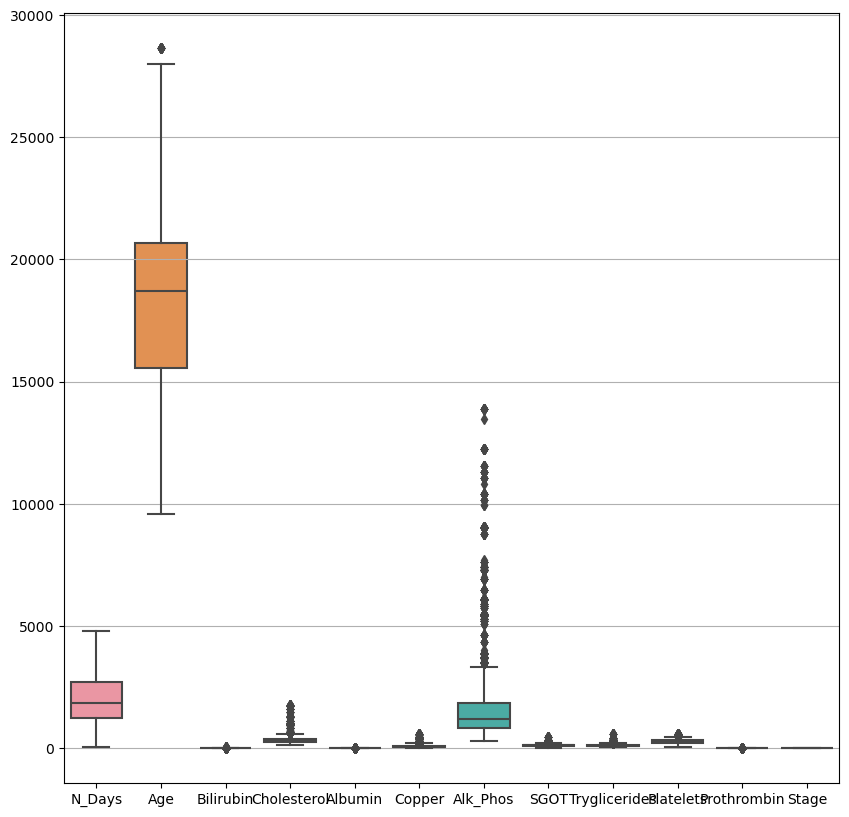

In [60]:
plt.figure(figsize=(10,10))
plt.grid()
sns.boxplot(data=train);

<Axes: xlabel='Status', ylabel='Age'>

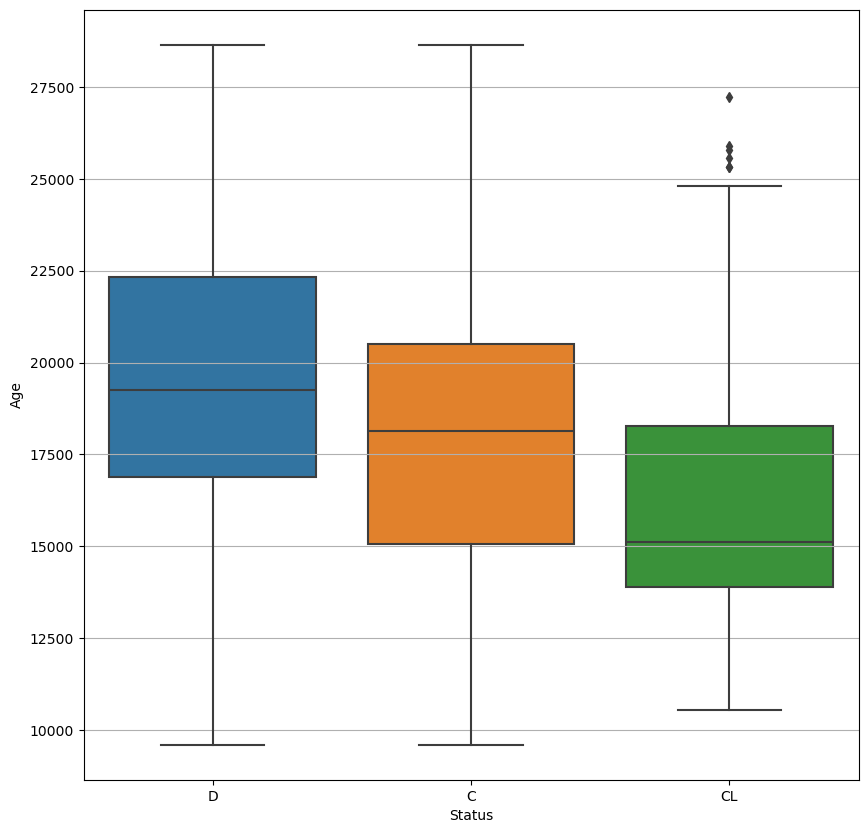

In [61]:
plt.figure(figsize=(10,10))
plt.grid()
sns.boxplot(data=train,x="Status",y="Age")

<Axes: xlabel='Status', ylabel='Cholesterol'>

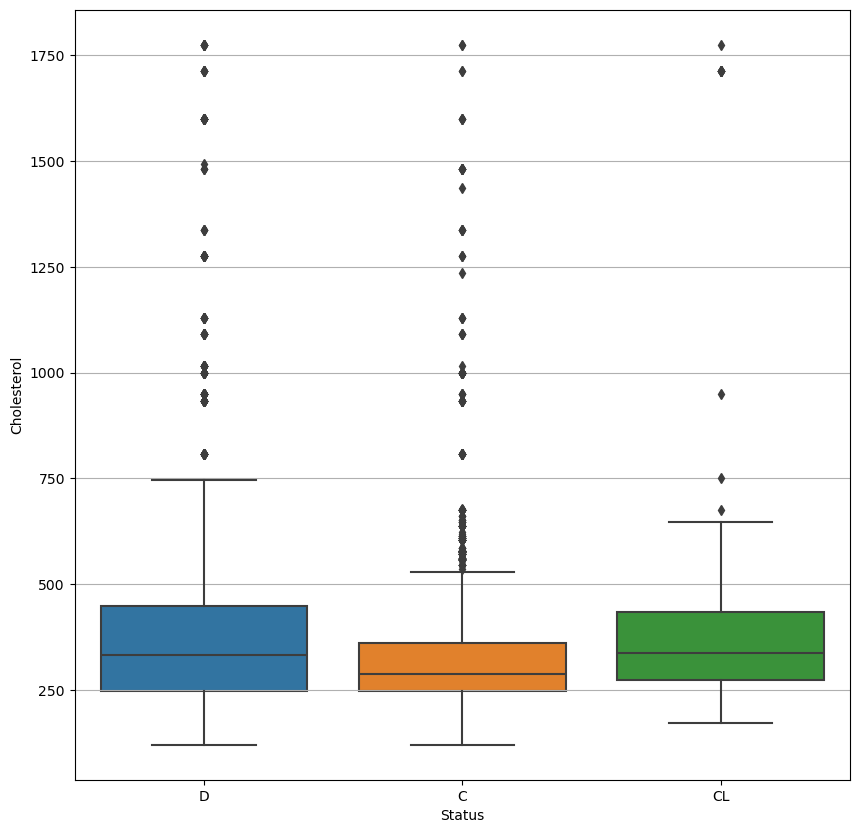

In [62]:
plt.figure(figsize=(10,10))
plt.grid()
sns.boxplot(data=train,x="Status",y="Cholesterol")

<Axes: xlabel='Status', ylabel='count'>

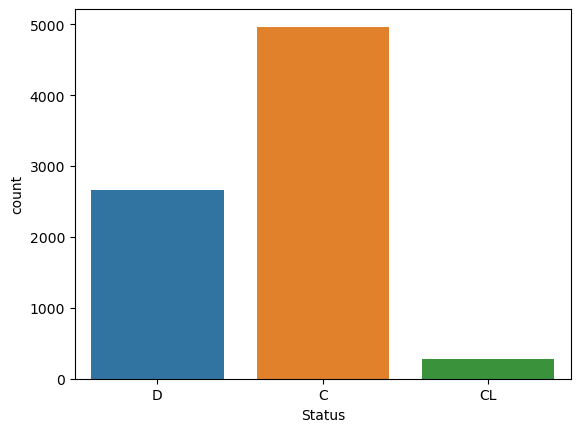

In [63]:
sns.countplot(data = train,x= 'Status')   ##given data is imbalanced

<Axes: >

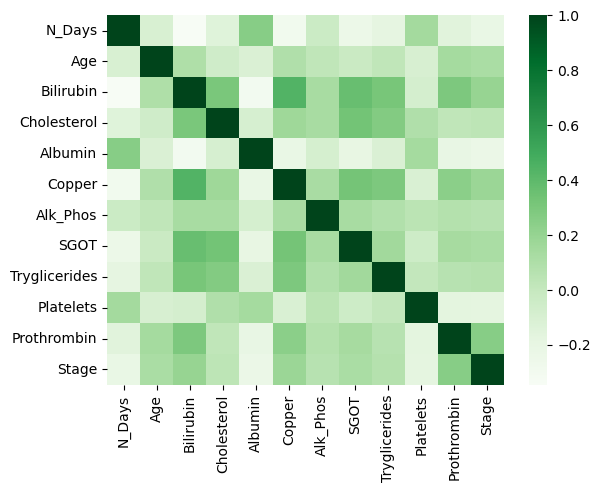

In [64]:
sns.heatmap(train.corr(numeric_only=True), cmap='Greens')

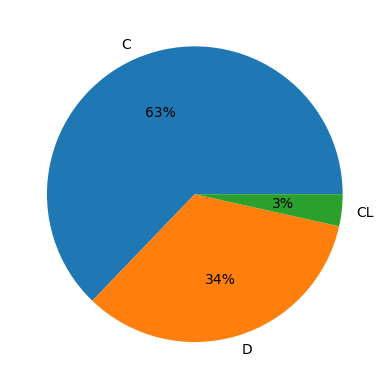

In [65]:
plt.pie(x=train['Status'].value_counts(), labels=['C','D','CL'], autopct='%.0f%%')  ##dataset imbalanced
plt.show()

array([[<Axes: title={'center': 'N_Days'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Copper'}>],
       [<Axes: title={'center': 'Alk_Phos'}>,
        <Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'Tryglicerides'}>],
       [<Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Prothrombin'}>,
        <Axes: title={'center': 'Stage'}>]], dtype=object)

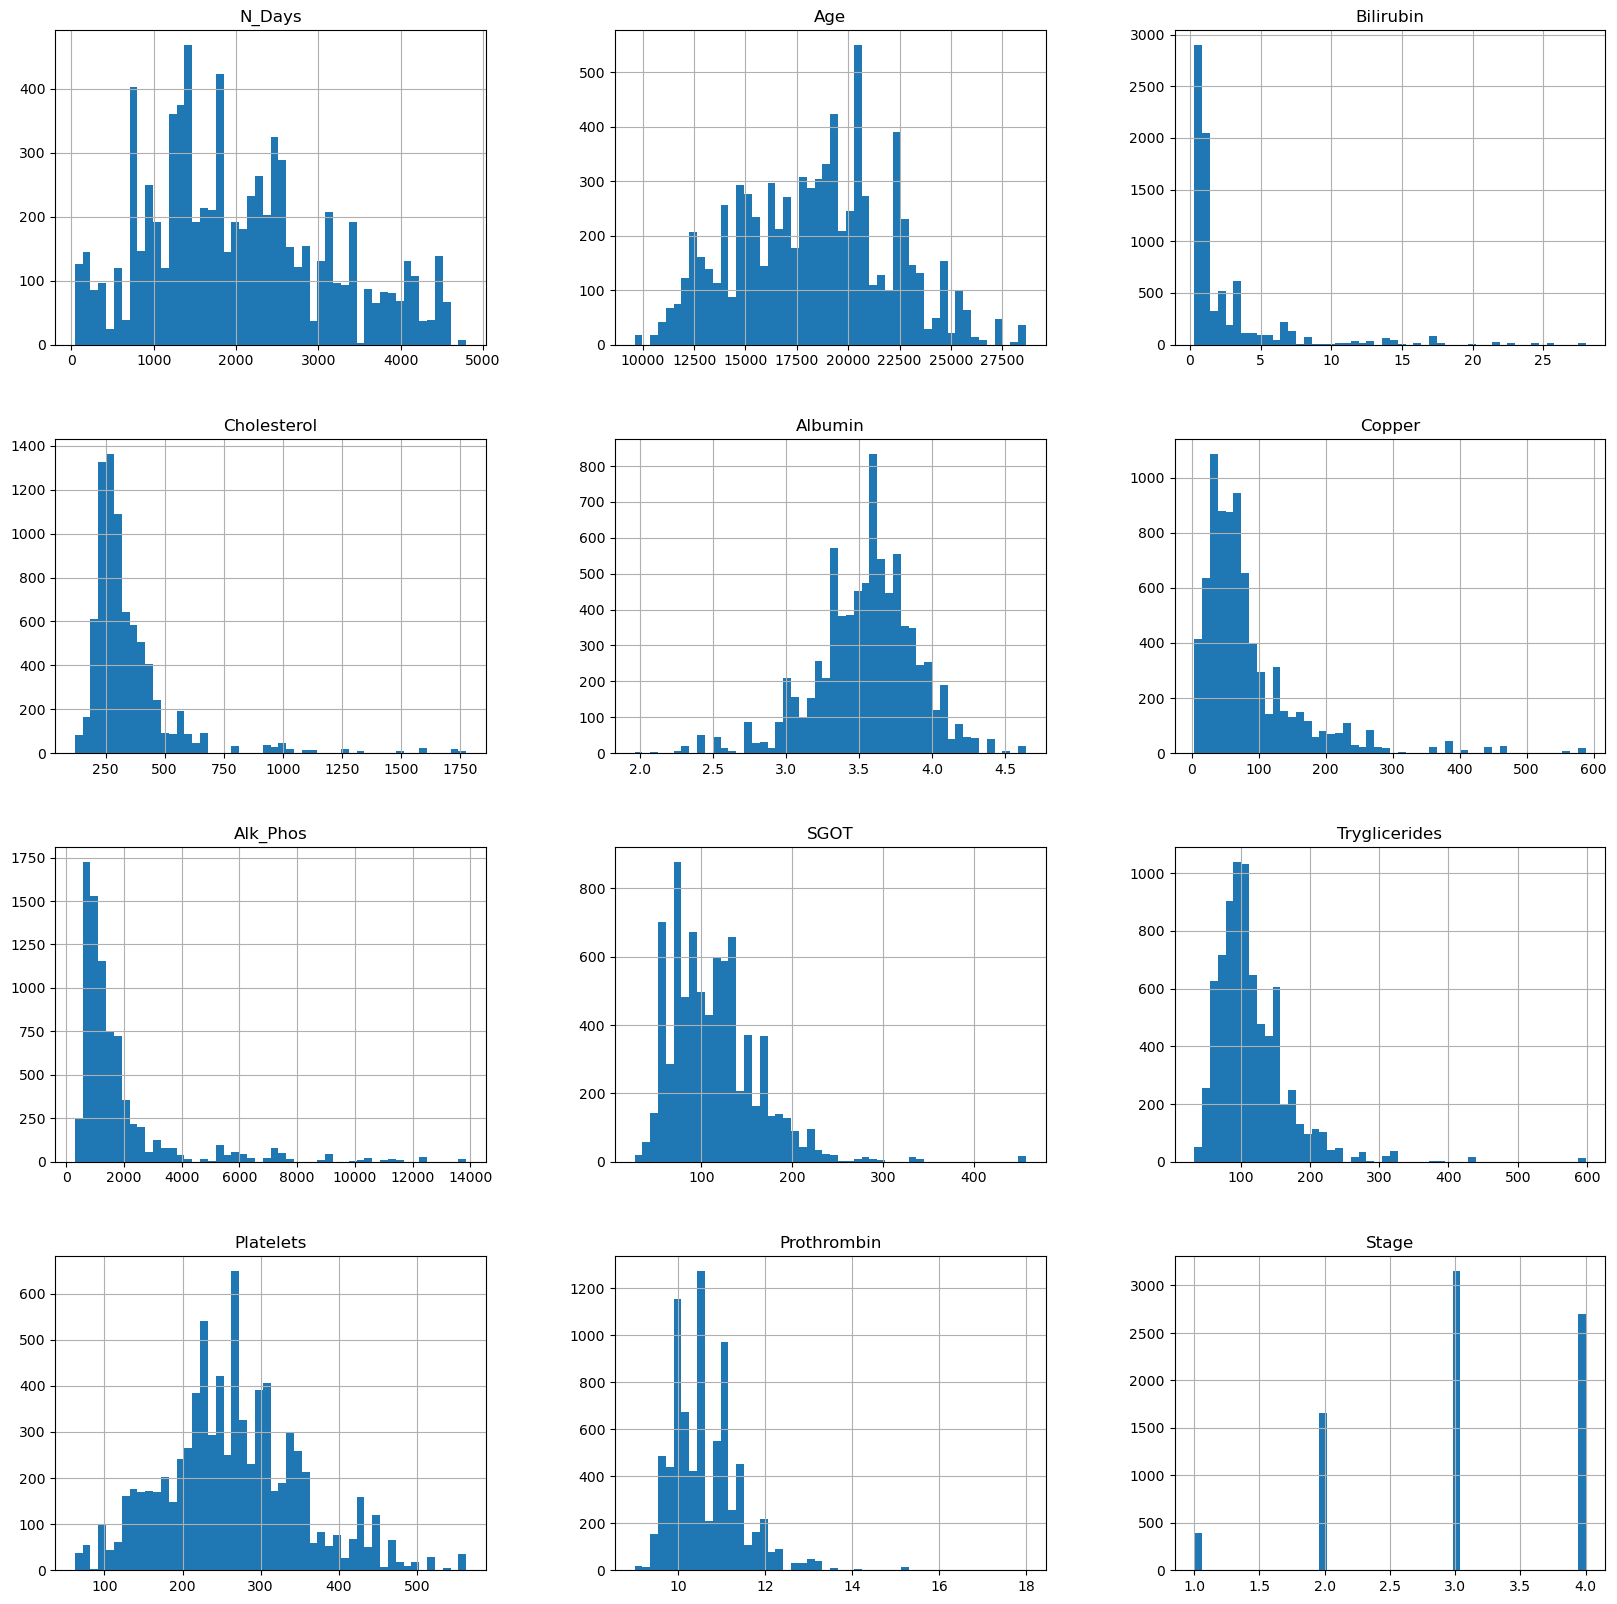

In [66]:
train.hist(bins = 50,figsize = (20,20))

<Axes: xlabel='Ascites', ylabel='count'>

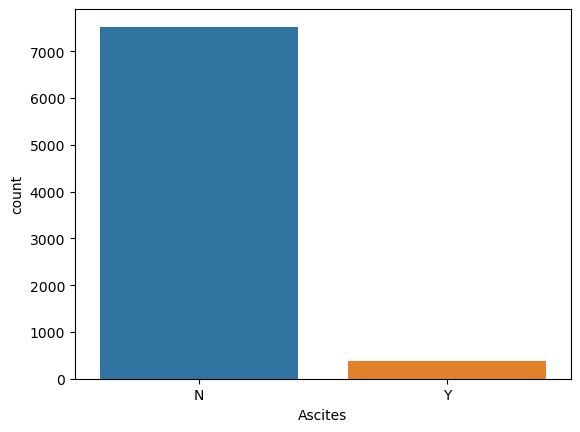

In [67]:
sns.countplot(data = train, x = 'Ascites')

In [68]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [69]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [70]:
OE=OrdinalEncoder()
x=OE.fit_transform(x)

In [71]:
LE=LabelEncoder()
y=LE.fit_transform(y)

In [72]:
SC=StandardScaler()
x=SC.fit_transform(x)

In [73]:
df=pd.DataFrame(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Define the grid of hyperparameters

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.8638854731137974


KNN

In [76]:
k=3
model = KNeighborsClassifier(n_neighbors=k)


In [77]:
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [78]:
from sklearn.metrics import classification_report
ypred=model.predict(X_test)
train=model.score(X_train_resampled,y_train_resampled)
test=model.score(X_test,y_test)
Accuracy_report=classification_report(y_test,ypred)
print(f"Training Accuracy:{train}\nTesting Accuracy:{test}\n \nClassification report: {Accuracy_report}")

Training Accuracy:0.9335667250145869
Testing Accuracy:0.6976597090449083
 
Classification report:               precision    recall  f1-score   support

           0       0.83      0.73      0.78       966
           1       0.12      0.40      0.19        52
           2       0.67      0.67      0.67       563

    accuracy                           0.70      1581
   macro avg       0.54      0.60      0.55      1581
weighted avg       0.75      0.70      0.72      1581



Confusion Matrix:
[[707  83 176]
 [ 19  21  12]
 [124  64 375]]




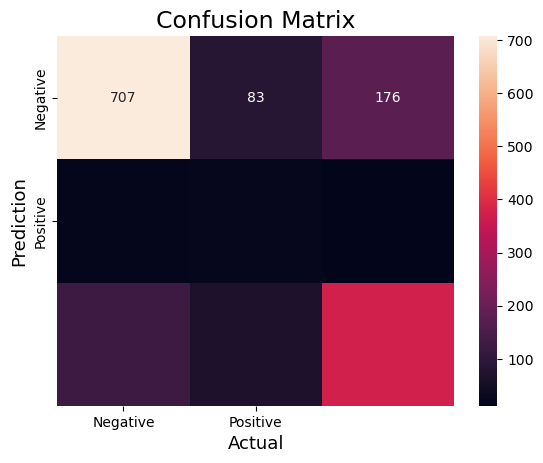

In [79]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(cm)

print("\n")

   
sns.heatmap(cm, annot=True,fmt='g',xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
